<h1 style="color: rgb(0, 91, 94);">Bias</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />



In this notebook, you will learn about bias - statistical and cognitive.

In [1]:
# Numerical arrays.
import numpy as np

# Plots.
import matplotlib.pyplot as plt

<h2 style="color: rgb(0, 91, 94);">Cognitive Bias</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

*The hope for informed gossip is that there are distinctive patterns in the errors people make. Systematic errors are known as biases, and they recur predictably in particular circumstances. When the handsome and confident speaker bounds onto the stage, for example, you can anticipate that the audience will judge his comments more favorably than he deserves. The availability of a diagnostic label for this bias—the halo effect—makes it easier to anticipate, recognize, and understand.*

-- Kahneman; Thinking Fast and Slow

<a style="color: #ff791e" href="https://github.com/ianmcloughlin/papers/raw/master/tversky-kahneman-heuristics-biases.pdf"><i>Judgment under Uncertainty: Heuristics and Biases;</i></a><br>Amos Tversky and Daniel Kahneman; Science, New Series, Vol. 185, No. 4157. (Sep. 27, 1974), pp. 1124-1131.

<a style="color: #ff791e" href="https://github.com/ianmcloughlin/papers/raw/master/tversky-kahneman-framing-of-decisions.pdf"><i>The Framing of Decisions and the Psychology of Choice;</i></a><br>Amos Tversky and Daniel Kahneman; Science, Vol. 211, 30 January 1981.

<a style="color: #ff791e" href="https://github.com/ianmcloughlin/papers/raw/master/kruger-dunning-ones-incompetence.pdf"><i>Unskilled and Unaware of It: How Difficulties in Recognizing One's Own Incompetence Lead to Inflated Self-Assessments;</i></a><br>Justin Kruger and David Dunning; Psychology, 2009, 1, 30-46.

<a style="color: #ff791e" href="https://plato.stanford.edu/entries/aristotle-rhetoric/"><i>Aristotle’s Rhetoric;</i></a><br>Stanford Encyclopedia of Philosophy

<a style="color: #ff791e" href="https://github.com/ianmcloughlin/papers/raw/master/lousville-logos-pathos-ethos-kairos.pdf"><i>Logos, Ethos, Pathos, Kairos;</i></a><br>University of Louisville Writing Center.

<h3 style="color: rgb(0, 91, 94);">Guessing Game</h3>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Below is some code that you shouldn't try to understand for now.

The game is to, in English, give a precise rule that describes when the function returns True.

In [2]:
# This code is obfuscated on purpose.
import operator as o__

def test(L):
    return True if o__.__ge__(0b10001, len(L) * 2 + sum([i - 0b10 for i in L])) and all([o__.__ge__(L[::-1][i], L[::-1][i+0b1]) for i in range(len(L)-1)]) else False

So, we can repeatedly call the function as follows, with different lists of integers.

In [3]:
test([1, 2, 3, 4])

True

In [4]:
test([2, 3])

True

In [5]:
test([3, 2, 1])

False

In [6]:
test([1, 2, 3, 10])

True

In [7]:
test([1, 3, 2])

False

So what is the rule?

How confident are you that that is the rule?

Let's test your rule.

Tell me what the outputs of the following code should be.

In [8]:
test([1, 2, 3, 4])

True

In [9]:
test([2, 3, 5, 10])

False

Note that the point here is to think about your confidence in your answer and how you got confident.

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Give three real-world examples of different types of cognitive bias.

<hr style="border-top: 1px solid #001a79;" />

<h2 style="color: rgb(0, 91, 94);">Statistical Bias</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Two of the common calculations you will find in the statistics literature are mean and standard deviation.

The mean is straight-forward - it is the usual calculation that people call the average.

You take all of the numbers you have, add them up, and then divide by the number of them.

<h3 style="color: rgb(0, 91, 94);">Mean</h3>

Suppose you take a sample of values from a larger population of values.

In [10]:
# Generate a sample of 1000 values from a normal distribution.
x = np.random.normal(10.0, 1.0, 1000)
x

array([ 8.15539044, 10.66624571,  8.33519747, 11.81165287, 11.46362355,
        9.17763053, 11.15452187, 10.97969335, 10.64977562,  7.88152065,
       10.61234807,  8.37105772, 11.0333883 , 11.82218472,  9.61504499,
       11.15521404,  9.33377455, 11.7344773 , 11.78930951,  8.56241045,
        8.91449524,  7.62732893, 11.23298759, 10.93024082, 10.26686794,
        7.73419425,  9.97742579,  9.71759424,  8.15264745, 11.24470859,
        9.86589479,  9.57047783, 10.97106338,  8.92597174, 11.82365939,
        9.97186207, 10.41499505,  9.53340677, 10.9156896 ,  9.04372341,
       11.27596865,  9.81363795, 10.8819702 , 10.45073705,  8.11395419,
        9.86866263, 10.09129066, 10.05436615,  8.02442463, 10.02956424,
       10.80494155,  9.16963387,  8.60427254, 11.81306523, 10.44234686,
       10.97852129,  7.96638465,  9.59795969, 10.45179242, 10.73911924,
       10.12198825, 11.5337204 , 11.08331993,  9.6793454 , 11.65252975,
        9.21775887,  9.90889927,  9.09837491, 10.48490357,  9.10


If you take the mean of the sample, it is a good estimate of the population average.

In [11]:
# We expect the mean of the sample to be close to the mean of the population.
x.mean()

9.962564461693272

What do mean by a good estimate?

To investigate, let us take lots of samples.

In [12]:
# Let's run a simulation of taking 1000 samples of size 1000.
samples = np.random.normal(10.0, 1.0, (1000, 1000))
samples

array([[10.17249668, 11.49814997, 11.70452307, ..., 11.02500515,
         8.3198605 ,  9.53535862],
       [13.01669515, 10.60982696, 10.084878  , ...,  9.59812006,
        10.21974578, 10.07851245],
       [11.47825543,  9.44185883, 11.90065169, ...,  9.00472589,
        13.13923708, 10.11900659],
       ...,
       [ 9.9701009 , 10.57677938,  9.12966733, ..., 10.27343702,
         9.5741472 ,  9.0927446 ],
       [ 9.72150973, 11.82952332,  8.59516035, ..., 10.96203582,
        10.42260787, 10.01629318],
       [11.64781447,  8.15153644,  8.76512576, ..., 10.09802256,
         8.96388023, 11.24027468]])

In [13]:
# Get the mean of the first sample.
samples[0].mean()

9.979417344426787

In [14]:
# Calculate the mean of all samples.
sample_means = samples.mean(axis=1)
sample_means

array([ 9.97941734, 10.0066443 , 10.01361351,  9.96563107,  9.99912318,
        9.99736425, 10.02702069,  9.98262275, 10.0213858 ,  9.99558662,
        9.99511264, 10.06440701,  9.98638373,  9.99513069,  9.9761771 ,
        9.97844396, 10.01130419, 10.02917513,  9.99460334,  9.97159883,
       10.00509173,  9.96666971, 10.02833395,  9.98270229, 10.02483309,
        9.99918874, 10.02452764,  9.97193684,  9.99331074, 10.00728836,
        9.96386092, 10.03270338, 10.03781381,  9.9401722 ,  9.97764734,
        9.95631497,  9.98850317,  9.99091036, 10.01211491, 10.04554383,
       10.00309744, 10.01530518,  9.92878471, 10.01436688,  9.93990043,
       10.04080668,  9.9821738 , 10.01224742,  9.97350379, 10.00011778,
        9.98872076, 10.00770566,  9.97853795, 10.0175674 , 10.00101046,
        9.96439334,  9.97889225,  9.98708258, 10.05158187, 10.02874188,
       10.05805732, 10.0441746 ,  9.96548591, 10.0517066 ,  9.96475048,
        9.97451997,  9.9806107 ,  9.99421074, 10.00769542,  9.97

Let's plot the means in a histogram.

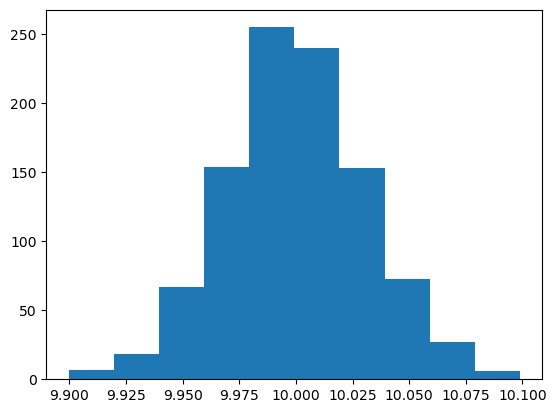

In [15]:
plt.hist(sample_means);

<h3 style="color: rgb(0, 91, 94);">Standard Deviation</h3>

The standard deviation is a different story.

First of all, the calculation is not as familiar.

It is designed to give a measure of how far the numbers are away from the mean in general.

The need for a such a measure is seen in the following example of calculating the mean of two sets of numbers.

In [16]:
# A list of nubmers - four small and one big.
numbers1 = np.array([1, 1, 1, 1, 10])
# Their mean.
np.mean(numbers1)

2.8

In [17]:
# A list of numbers - all close to each other.
numbers2 = np.array([2, 2, 3, 3, 4])
# Their mean.
np.mean(numbers2)

2.8

The example illustrates a common issue.

The mean on its own does is limited as a summary of the data points.

That is why we use the standard deviation - it gives us a measure of the spread.

Let's see how it is calculated.

First we'll generate a sample.

In [18]:
# Generate a sample of values - note we can see the population standard deviation.
x = np.random.normal(10.0, 1.0, 1000)
x

array([10.22590786, 11.1894405 , 10.87872696,  9.26055133, 10.6289637 ,
        7.91421066,  9.82962662,  9.05322161, 10.03375432,  9.4031311 ,
       10.15716285, 12.75549178,  8.1593521 ,  9.88936085,  9.67710808,
       10.30339709,  9.08031658,  8.14969199, 10.4776083 , 10.24061181,
       10.40003122,  9.95077291,  9.6837786 , 10.33282797,  8.78029885,
        7.27088983, 10.6712065 , 10.32797967,  9.73902546,  9.10719284,
       11.79497702, 10.33613882, 10.71331405,  9.56143206, 10.16702426,
        9.74612791, 10.29427245,  9.8616    ,  8.88966148,  9.15659582,
        9.9212439 , 10.34289759,  9.16217964,  7.38782634,  9.7022689 ,
       10.70820156, 10.44467978, 10.55488187,  8.47318073,  9.02096303,
        8.81260016,  7.6457814 ,  9.76900119, 10.31453672, 10.638464  ,
       11.76593032, 10.1225679 , 10.4810082 , 10.03312122,  9.7223788 ,
       10.25601782, 11.42713261,  8.8849219 , 10.96114793, 10.26304274,
        9.9600836 , 10.713079  , 10.57604259, 10.95594213, 10.26

Now, let us calculate the mean and investigate it.

In [19]:
# Calculate the mean.
x_mean = x.mean()

# Subtract the mean from each of the values.
zeroed = x - x_mean

In [20]:
# What do you think the mean of zeroed is?
zeroed.mean()

-1.6786572132332366e-15

In [21]:
# This will give us a better view of it - correct to four decimal places.
print(f'{zeroed.mean():0.4f}')

-0.0000


So, subtracting the mean of the sample results in the mean being zero.

The standard deviation is an adjustment to the above calculation.

The goal is to summarise the zeroed array without losing information about the distance of each point from the mean.

Let's see if we can come up with a plot of the idea.

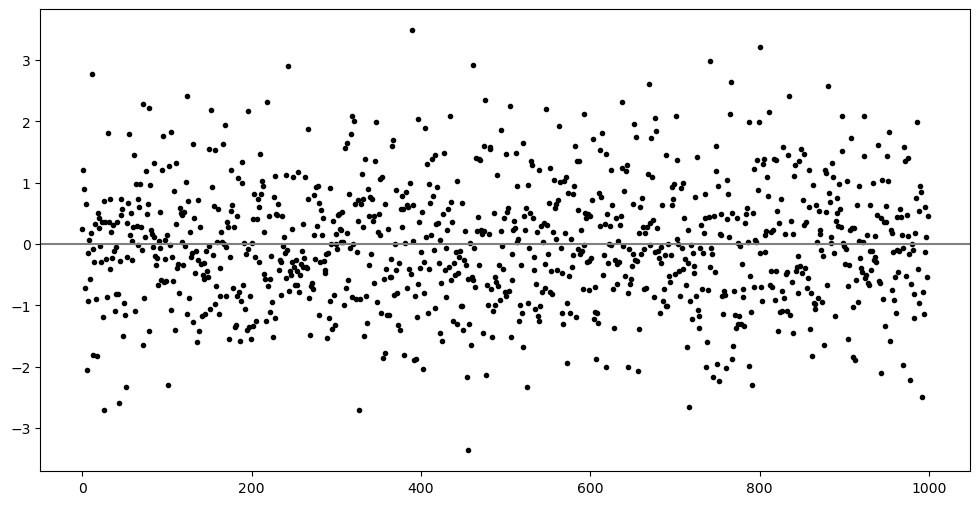

In [29]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the zeroed array, each value spaced out evenly along the x axis.
# Note the x axis is just the position of the value in the zeroed array.
ax.plot(range(len(zeroed)), zeroed, 'k.')

# Plot the y=0 line.
ax.axhline(y=0.0, color='grey', linestyle='-');

One idea is to take the average (vertical) distance each point is from the mean, zero.

We need to be careful - there are negative and positive values here.

By definition, they sum to zero.

In [32]:
# Sum the array.
print(f'{zeroed.sum():0.4f}')

-0.0000


We can try instead taking the absolute value.

This makes sense, because we expect distances to be positive.

In [34]:
# Absolute values.
np.abs(zeroed)

array([2.49997876e-01, 1.21353052e+00, 9.02816968e-01, 7.15358662e-01,
       6.53053710e-01, 2.06169932e+00, 1.46283364e-01, 9.22688377e-01,
       5.78443351e-02, 5.72778892e-01, 1.81252866e-01, 2.77958180e+00,
       1.81655789e+00, 8.65491382e-02, 2.98801906e-01, 3.27487104e-01,
       8.95593410e-01, 1.82621800e+00, 5.01698315e-01, 2.64701820e-01,
       4.24121235e-01, 2.51370791e-02, 2.92131391e-01, 3.56917978e-01,
       1.19561114e+00, 2.70502016e+00, 6.95296516e-01, 3.52069685e-01,
       2.36884528e-01, 8.68717147e-01, 1.81906703e+00, 3.60228832e-01,
       7.37404062e-01, 4.14477928e-01, 1.91114270e-01, 2.29782078e-01,
       3.18362459e-01, 1.14309989e-01, 1.08624851e+00, 8.19314167e-01,
       5.46660879e-02, 3.66987606e-01, 8.13730348e-01, 2.58808364e+00,
       2.73641086e-01, 7.32291572e-01, 4.68769792e-01, 5.78971878e-01,
       1.50272925e+00, 9.54946959e-01, 1.16330982e+00, 2.33012859e+00,
       2.06908795e-01, 3.38626734e-01, 6.62554011e-01, 1.79002033e+00,
      

In [35]:
# Average absolute value.
np.mean(np.abs(zeroed))

0.7880687976165552

While this is a reasonable measure of spread, it is not typically the one used.

For a discussion, see this Cross Validated post: https://stats.stackexchange.com/q/118

Instead we usually square the values.

Note squaring a number gives a positive value.

It is also somewhat easier to work with analytically.

In [38]:
# Square the values.
np.square(zeroed)

array([6.24989379e-02, 1.47265631e+00, 8.15078478e-01, 5.11738015e-01,
       4.26479148e-01, 4.25060410e+00, 2.13988227e-02, 8.51353842e-01,
       3.34596710e-03, 3.28075659e-01, 3.28526013e-02, 7.72607496e+00,
       3.29988256e+00, 7.49075333e-03, 8.92825788e-02, 1.07247804e-01,
       8.02087556e-01, 3.33507218e+00, 2.51701200e-01, 7.00670535e-02,
       1.79878822e-01, 6.31872745e-04, 8.53407496e-02, 1.27390443e-01,
       1.42948600e+00, 7.31713406e+00, 4.83437246e-01, 1.23953063e-01,
       5.61142798e-02, 7.54669482e-01, 3.30900486e+00, 1.29764811e-01,
       5.43764751e-01, 1.71791952e-01, 3.65246643e-02, 5.27998035e-02,
       1.01354656e-01, 1.30667735e-02, 1.17993583e+00, 6.71275703e-01,
       2.98838116e-03, 1.34679903e-01, 6.62157079e-01, 6.69817694e+00,
       7.48794439e-02, 5.36250947e-01, 2.19745118e-01, 3.35208435e-01,
       2.25819521e+00, 9.11923694e-01, 1.35328974e+00, 5.42949924e+00,
       4.28112494e-02, 1.14668065e-01, 4.38977817e-01, 3.20417278e+00,
      

Note that when you square numbers, bigger values get bigger.

Larger deviations from the mean will contribute relatively more to the standard deviation.

That is not necessarily a bad thing, it is just something to note.

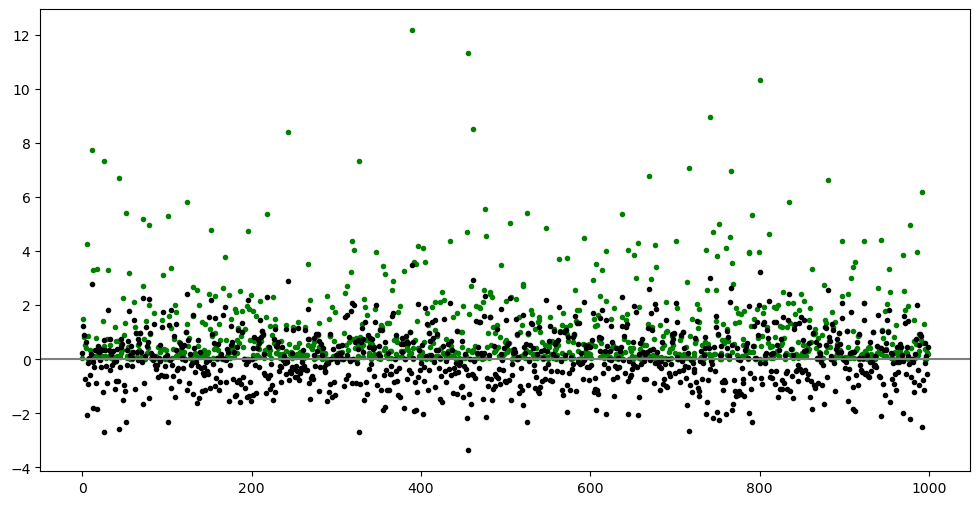

In [66]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the squared zeroed array, each value spaced out evenly along the x axis.
# Note the x axis is just the position of the value in the zeroed array.
ax.plot(range(len(zeroed)), np.square(zeroed), color='green', marker='.', linestyle='none')

# Plot the zeroed array, each value spaced out evenly along the x axis.
# Note the x axis is just the position of the value in the zeroed array.
ax.plot(range(len(zeroed)), zeroed, 'k.')

# Plot the y=0 line.
ax.axhline(y=0.0, color='grey', linestyle='-');

In [51]:
# Calculate the average squared result.
np.mean(np.square(zeroed))

1.001710596100184

Now, because we have squared the original values, we often take the square root of the answer.

In [52]:
# Calculate the square root of the average squared result.
np.sqrt(np.mean(np.square(zeroed)))

1.0008549325952207

So, here is the full calculation.

In [53]:
# The full calculation using the original array.
np.sqrt(np.mean(np.square(x - np.mean(x))))

1.0008549325952207

This common calculation is built into numpy.

Note this is very close (by design) to the second parameter we sent to `np.random.normal`.

In [54]:
# Note that the function is built into numpy.
x.std()

1.0008549325952207

<h2 style="color: rgb(0, 91, 94);">Bessel's Correction</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The above calculation of the standard deviation has one flaw.

If you calculate the standard deviation of a sample, it is a biased estimator for the standard deviation of the population.

<h3 style="color: rgb(0, 91, 94);">Excel's Standard Deviation</h3>

This was a common issue in Excel in years gone by.

See the following warning on the official STDEV function documentation for Excel:

*Important: This function has been replaced with one or more new functions that may provide improved accuracy and whose names better reflect their usage. Although this function is still available for backward compatibility, you should consider using the new functions from now on, because this function may not be available in future versions of Excel.*

https://support.microsoft.com/en-us/office/stdev-function-51fecaaa-231e-4bbb-9230-33650a72c9b0

The functions replacing it are STDEVP and STDEV.S:

https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

https://support.microsoft.com/en-us/office/stdevp-function-1f7c1c88-1bec-4422-8242-e9f7dc8bb195

<h3 style="color: rgb(0, 91, 94);">Biased Estimators</h3>

The issue is apparent when we repeatedly draw samples from a population.

If we use the above calculation on each sample, we will systematically under-estimate the standard deviation.

Let us see if we can see this in a plot.

We will use small small samples as the effect it clearer.

In [89]:
# Create 100000 samples of size 5 - standard deviation is 2.0.
samples = np.random.normal(0.0, 2.0, (100000, 5))
samples

array([[-1.35391017, -2.83199945,  2.97138887, -1.39612115,  0.52977404],
       [ 0.60845837, -0.13948827,  0.12107288,  0.84183779,  0.11855318],
       [ 3.22431922, -2.70934061, -0.05427521,  0.56586749, -1.17559328],
       ...,
       [ 0.00527085,  2.52977309, -1.22018764, -0.81483282,  0.14487079],
       [-3.63488135, -1.375275  ,  3.53956171, -3.4331741 , -1.62544277],
       [-2.45792839,  0.08327214,  1.10171831,  0.85158314, -0.82851911]])

In [90]:
# Calculate standard deviation without correction.
stdevs = samples.std(axis=1)
stdevs

array([2.00231156, 0.35953132, 1.97167395, ..., 1.30310398, 2.58978257,
       1.29316126])

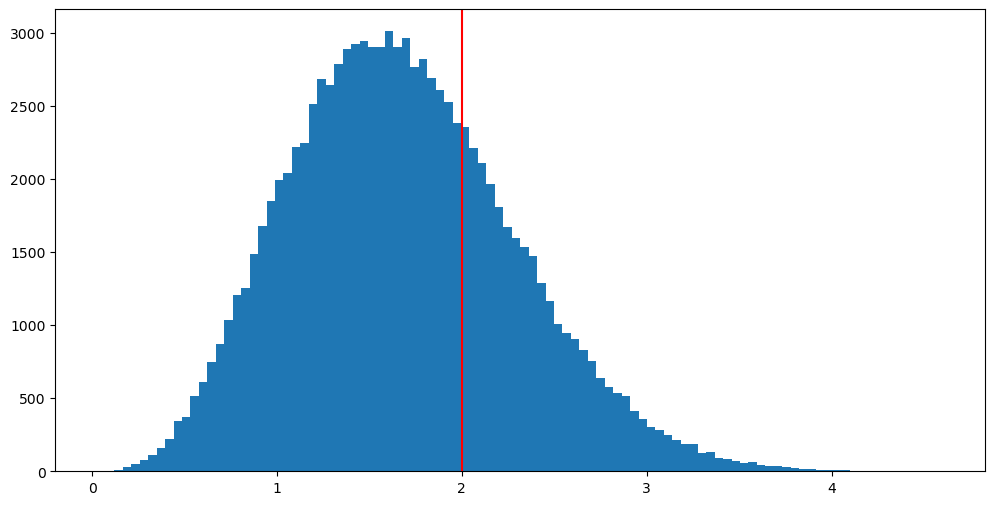

In [91]:
# View a histogram - hopefully we can see the estimate is too small.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram.
plt.hist(stdevs, bins=100)

# Draw a vertical line where the actual standard deviation is.
plt.axvline(x=2.0, color='red');

It seems clear that the tip of the curve is below the actual value.

<h3 style="color: rgb(0, 91, 94);">The Correction</h3>

Bessel's correction actually applies to the variance.

The variance of a sample is the square of the standard deviation.

It is what we get is we do not apply the `np.sqrt` function in the standard deviation calculation.

The correction is to mutliply the calculation be $\frac{n}{n-1}$.

In [70]:
# Uncorrected variance.
np.mean(np.square(x - np.mean(x)))

1.001710596100184

In [71]:
# Corrected variance.
np.mean(np.square(x - np.mean(x))) * (len(x) / (len(x) - 1.0))

1.0027133094095937

The correction can be applied to the standard deviation directly, but will still lead to 

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Show that the difference between the standard deviation calculations is greatest for small sample sizes.

<hr style="border-top: 1px solid #001a79;" />

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>